In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from math import pi

In [2]:
nH = 1e-9
pF = 1e-12
MHz = 1e6

In [3]:
def load_data(fn, nports=2):
    dataset = np.loadtxt(fn, skiprows=9, delimiter=',')
    if nports==2:
        dtypes = np.dtype([("frequency", np.float64), ("Y11", np.complex128),\
            ("Y12", np.complex128), ("Y21", np.complex128), ("Y22", np.complex128)])
        y11 = dataset[:, 1] + 1j*dataset[:, 2]
        y12 = dataset[:, 3] + 1j*dataset[:, 4]
        y21 = dataset[:, 5] + 1j*dataset[:, 6]
        y22 = dataset[:, 7] + 1j*dataset[:, 8]
        tup = list(zip(dataset[:, 0], y11, y12, y21, y22))
        return np.array(tup, dtype=dtypes)
    elif nports==3:
        dtypes = np.dtype([("frequency", np.float64), ("Y11", np.complex128),\
            ("Y12", np.complex128), ("Y13", np.complex128), ("Y21", np.complex128),\
            ("Y22", np.complex128), ("Y23", np.complex128), ("Y31", np.complex128),\
            ("Y32", np.complex128), ("Y33", np.complex128)])
        y11 = dataset[:, 1] + 1j*dataset[:, 2]
        y12 = dataset[:, 3] + 1j*dataset[:, 4]
        y13 = dataset[:, 5] + 1j*dataset[:, 6]
        y21 = dataset[:, 7] + 1j*dataset[:, 8]
        y22 = dataset[:, 9] + 1j*dataset[:,10]
        y23 = dataset[:,11] + 1j*dataset[:,12]
        y31 = dataset[:,13] + 1j*dataset[:,14]
        y32 = dataset[:,15] + 1j*dataset[:,16]
        y33 = dataset[:,17] + 1j*dataset[:,18]
        tup = list(zip(dataset[:, 0], y11, y12, y13, y21, y22, y23, y31, y32, y33))
        return np.array(tup, dtype=dtypes)
   

In [4]:
inductor_fn = "../numerical_sims/waffle_inductor.csv"
capacitor_fn = "../numerical_sims/cap_273_full.csv"
ind_params = load_data(inductor_fn, nports=2)
cap_params = load_data(capacitor_fn, nports=3)

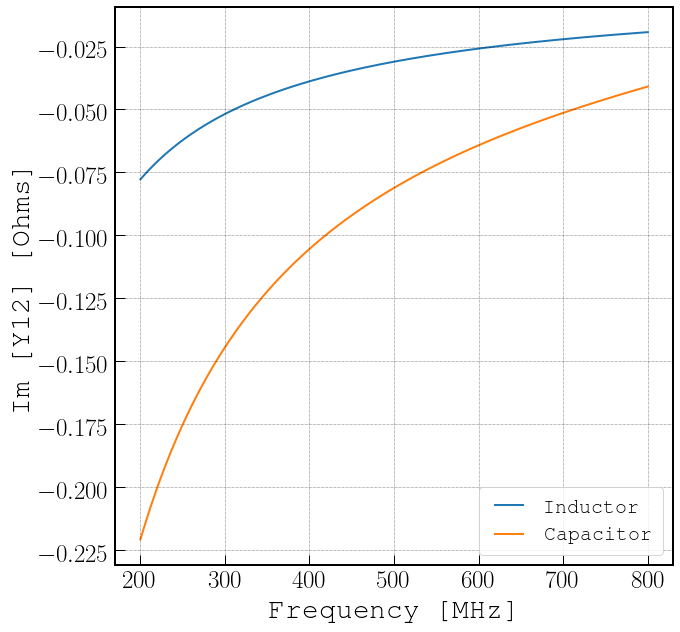

In [17]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(ind_params['frequency'], -ind_params['Y12'].imag, label='Inductor')
ax.plot(cap_params['frequency'], -cap_params['Y23'].imag, label='Capacitor')
ax.grid(which='both')
ax.set_xlabel('Frequency [MHz]')
ax.set_ylabel(r'Im [Y12] [Ohms]')
ax.axis('tight')
ax.legend(loc='best');

In [35]:
f = ind_params['frequency']
omega = f * 2*pi*MHz
C = 1/omega/np.imag(1/cap_params['Y23'])/pF
L = -1/omega*np.imag(1/ind_params['Y12'])/nH

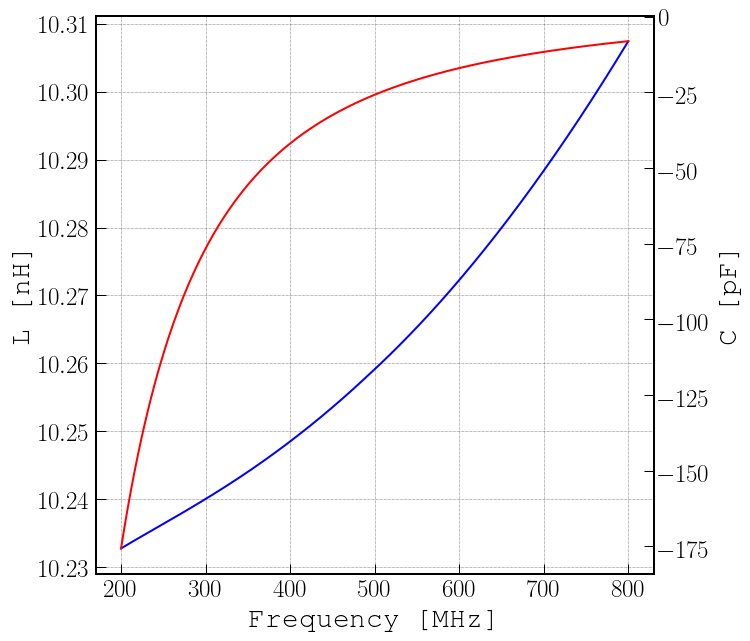

In [36]:
fig, ax = plt.subplots(figsize=(10,10))
ax2 = ax.twinx()
ax.plot(f, L, 'b', label='Inductance')
ax2.plot(f, C, 'r', label='Capacitance')
# ax.plot(cap_params['frequency'], -cap_params['Y12'].imag, label='Capacitor')
ax.grid(which='both')
ax.set_xlabel('Frequency [MHz]')
ax.set_ylabel(r'L [nH]')
ax2.set_ylabel(r'C [pF]')
ax.axis('tight');

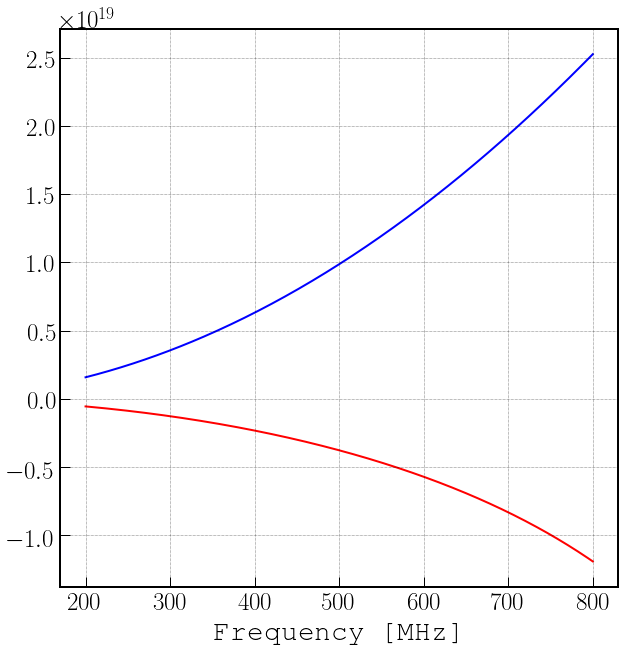

In [37]:
fig, ax = plt.subplots(figsize=(10,10))
# ax2 = ax.twinx()
ax.plot(f, omega**2, 'b')
ax.plot(f, 1/(L*nH*C*pF), 'r', label='Capacitance')
# ax.plot(cap_params['frequency'], -cap_params['Y12'].imag, label='Capacitor')
ax.grid(which='both')
ax.set_xlabel('Frequency [MHz]')
ax.axis('tight');